This notebook is used to load the data from https://www.kaggle.com/datasets/deepcontractor/cyber-security-salaries, clean it up and save it in salaries_cyber_us_cleaned.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing data

In [2]:
# Dataset: https://www.kaggle.com/datasets/deepcontractor/cyber-security-salaries
df = pd.read_csv("salaries_cyber.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Security Analyst,145000,USD,145000,US,0,US,M
1,2023,MI,FT,Security Analyst,115000,USD,115000,US,0,US,M
2,2023,SE,FT,DevSecOps Engineer,160000,USD,160000,US,0,US,M
3,2023,SE,FT,DevSecOps Engineer,120000,USD,120000,US,0,US,M
4,2023,SE,FT,Security Engineer,96000,GBP,117136,GB,100,GB,M


In [3]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,2119.000000,2.119000e+03,2119.000000,2119.000000
mean,2021.786220,3.932605e+05,128679.617272,59.745163
std,0.842721,1.086276e+07,62154.510355,45.533571
min,2020.000000,5.800000e+03,5337.000000,0.000000
25%,2021.000000,8.700000e+04,83700.000000,0.000000
50%,2022.000000,1.260000e+05,122000.000000,100.000000
75%,2022.000000,1.709425e+05,165100.000000,100.000000
max,2023.000000,5.000000e+08,456621.000000,100.000000


## Countries

In [4]:
top_10_countries = df.groupby("company_location").count().sort_values(by="work_year", ascending=False).head(10).iloc[:, 1]
top_10_countries

company_location
US    1643
GB      96
CA      74
DE      41
AU      26
IN      24
FR      23
ES      20
NL      17
CH      15
Name: experience_level, dtype: int64

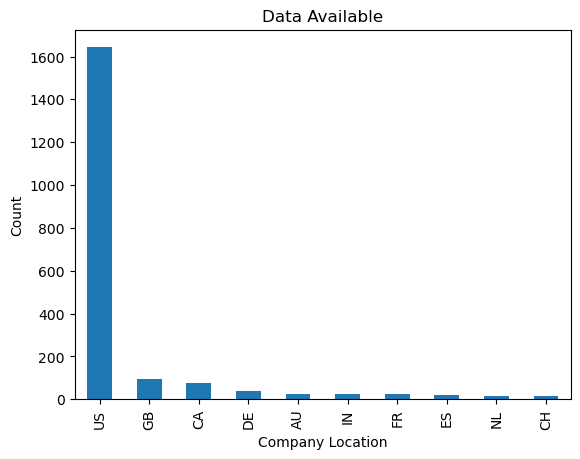

In [5]:
top_10_countries.plot(kind="bar", xlabel="Company Location", ylabel="Count", title="Data Available");

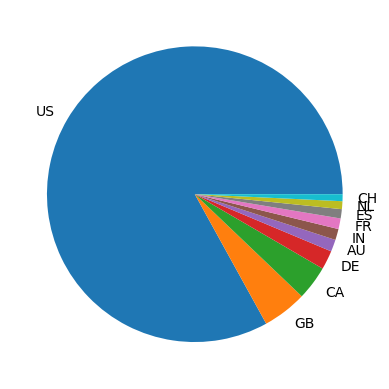

In [6]:
top_10_countries.plot(kind="pie", xlabel="", ylabel="");

In [7]:
top_10_countries["US"] / len(df)

0.7753657385559226

We can see most of the salaries are from the U.S. As most of the data is from the US, we will only consider US.

## When was the data for US collected?

In [8]:
df_us = df[ df["company_location"] == "US" ]
df_us.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Security Analyst,145000,USD,145000,US,0,US,M
1,2023,MI,FT,Security Analyst,115000,USD,115000,US,0,US,M
2,2023,SE,FT,DevSecOps Engineer,160000,USD,160000,US,0,US,M
3,2023,SE,FT,DevSecOps Engineer,120000,USD,120000,US,0,US,M
6,2023,SE,FT,Security Specialist,104000,USD,104000,US,100,US,M


In [9]:
df_us.loc[:, "work_year"].min()

2020

In [10]:
df_us.loc[:, "work_year"].max()

2023

We have data between 2020 and 2022.

## Analyzing job titles

In [11]:
us_job_titles = df_us["job_title"]
us_job_titles.head()

0       Security Analyst
1       Security Analyst
2     DevSecOps Engineer
3     DevSecOps Engineer
6    Security Specialist
Name: job_title, dtype: object

In [12]:
len( us_job_titles.unique() )

94

In this data set there are 78 different job titles.

In [13]:
us_job_titles.value_counts()

Security Engineer                          491
Security Analyst                           123
Cyber Security Analyst                     101
DevSecOps Engineer                          87
Cyber Security Engineer                     53
                                          ... 
IT Security Specialist                       1
Information System Security Engineer         1
Principal Application Security Engineer      1
Information Security Compliance Analyst      1
Security Officer 3                           1
Name: job_title, Length: 94, dtype: int64

We can see that most of the roles are Security Engineer roles. Also there are multiple job titles that describe the same jobs, e.g. Security Engineer and Cyber Security Engineer. So we have to clean the data.

# Cleaning US Data

## Cleaning Job Titles

Cleaning job titles to more general job titles:

In [14]:
def clean_job_titles(title: str):
    title = title.replace("Cyber ", "")
    title = title.replace("IT ", "")

    if title in ["Hunt SME", "Software Reverse Engineer", "Information System Security Engineer", "Detection Engineer", "IAM Engineer", "Product Security Engineer", "Computer Forensic Software Engineer", "Offensive Security Engineer", "Azure Security Engineer", "Infrastructure Security Engineer", "Corporate Security Engineer", "Staff Security Engineer", "Lead Information Security Engineer", "Principal Cloud Security Engineer", "Network and Security Engineer", "Software Security Engineer", "Cloud Security Engineer", "DevOps Security Engineer", "Information Security Engineer", "Application Security Engineer", "Staff Application Security Engineer", "Principal Application Security Engineer", "Principal Security Engineer", "Information Systems Security Engineer", "Enterprise Security Engineer", "Network Security Engineer", "Lead Security Engineer"]:
        return "Security Engineer"
    
    elif title in ["Cloud Security Analyst", "Information Security Compliance Analyst", "Compliance Analyst", "Information Security Analyst", "Data Security Analyst", "Application Security Analyst", "SOC Analyst", "Security Operations Analyst"]:
        return "Security Analyst"
    
    elif title in ["Vulnerability Management Engineer", "Vulnerability Analyst"]:
        return "Vulnerability Management"
    
    elif title in ["Compliance Specialist", "Application Security Specialist", "Information Security Specialist", "Security Training Specialist"]:
        return "Security Specialist"
    
    elif title in ["Information Systems Security Officer", "Security Officer 3", "Security Officer", "Information Security Officer"]:
        return "Chief Information Security Officer"
    
    elif title in ["Security Solutions Architect", "Application Security Architect", "Cloud Security Architect", "Information Security Architect"]:
        return "Security Architect"
    
    elif title in ["Penetration Testing Engineer", "Ethical Hacker"]:
        return "Penetration Tester"
    
    elif title in ["Security Incident Response Engineer", "Incident Response Analyst", "Digital Forensics Analyst"]:
        return "Incident Response"
    
    elif title in ["DevSecOps Engineer", "DevSecOps Engineer", "Security DevOps Engineer"]:
        return "DevSecOps"
    
    elif title in ["Threat Intelligence Response Analyst", "Threat Analyst", "Threat Intelligence Analyst"]:
        return "Threat Intelligence"
    
    elif title in ["Information Security Lead", "Security Operations Manager", "Security Compliance Manager", "Information Security Compliance Lead", "Security Engineering Manager", "Program Manager", "Privacy Manager", "Information Security Compliance Manager", "Incident Response Manager", "Incident Response Lead", "Information Security Manager"]:
        return "Security Manager"
    
    elif title in ["Head of Security", "Director of Information Security", "Head of Information Security"]:
        return "Security Director"
    
    elif title in ["Vulnerability Researcher"]:
        return "Security Researcher"
    
    return title

In [15]:
df_us["job_title"] = df_us.loc[:, "job_title"].apply( lambda title: clean_job_titles(title) )
df_us.loc[:, "job_title"].unique()

C:\Users\fahri\AppData\Local\Temp\ipykernel_9404\2848835057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us["job_title"] = df_us.loc[:, "job_title"].apply( lambda title: clean_job_titles(title) )


array(['Security Analyst', 'DevSecOps', 'Security Specialist',
       'Security Architect', 'Security Engineer', 'Security Researcher',
       'Chief Information Security Officer', 'Threat Intelligence',
       'Security Consultant', 'Security Manager', 'Penetration Tester',
       'Security Director', 'Threat Hunter', 'Incident Response',
       'Vulnerability Management'], dtype=object)

In [16]:
len(df_us.loc[:, "job_title"].unique())

15

In [17]:
df_us.groupby("job_title").count().sort_values(by="work_year")

,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
job_title,,,,,,,,,,
Threat Hunter,4,4,4,4,4,4,4,4,4,4
Vulnerability Management,10,10,10,10,10,10,10,10,10,10
Security Director,23,23,23,23,23,23,23,23,23,23
Incident Response,31,31,31,31,31,31,31,31,31,31
Security Consultant,37,37,37,37,37,37,37,37,37,37
Security Researcher,37,37,37,37,37,37,37,37,37,37
Security Specialist,53,53,53,53,53,53,53,53,53,53
Security Architect,55,55,55,55,55,55,55,55,55,55
Penetration Tester,58,58,58,58,58,58,58,58,58,58


## Removing unnecessary columns

In [18]:
df_us.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Security Analyst,145000,USD,145000,US,0,US,M
1,2023,MI,FT,Security Analyst,115000,USD,115000,US,0,US,M
2,2023,SE,FT,DevSecOps,160000,USD,160000,US,0,US,M
3,2023,SE,FT,DevSecOps,120000,USD,120000,US,0,US,M
6,2023,SE,FT,Security Specialist,104000,USD,104000,US,100,US,M


In [19]:
df_us["company_location"].unique()

array(['US'], dtype=object)

In [20]:
df_us["employee_residence"].value_counts()

US    1602
CA       9
IN       6
ES       4
DE       3
FR       3
PT       2
AU       2
GB       2
JO       1
CZ       1
GH       1
CR       1
JP       1
AE       1
NL       1
BR       1
GR       1
PK       1
Name: employee_residence, dtype: int64

In [21]:
df_us["employment_type"].value_counts()

FT    1632
PT       5
CT       5
FL       1
Name: employment_type, dtype: int64

In [22]:
df_us.drop(labels=["salary_currency", "salary_in_usd", "company_location"], axis=1)

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_size
0,2023,MI,FT,Security Analyst,145000,US,0,M
1,2023,MI,FT,Security Analyst,115000,US,0,M
2,2023,SE,FT,DevSecOps,160000,US,0,M
3,2023,SE,FT,DevSecOps,120000,US,0,M
6,2023,SE,FT,Security Specialist,104000,US,100,M
...,...,...,...,...,...,...,...,...
2110,2020,SE,FT,Security Specialist,170000,US,100,L
2111,2021,SE,FT,Security Engineer,135000,US,100,L
2112,2021,EN,FT,Security Analyst,100000,US,50,M
2116,2021,SE,FT,Penetration Tester,126000,US,100,L


In [23]:
df_us.drop(labels=["salary_currency", "salary_in_usd", "company_location"], axis=1, inplace=True)
df_us.head()

C:\Users\fahri\AppData\Local\Temp\ipykernel_9404\292729114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us.drop(labels=["salary_currency", "salary_in_usd", "company_location"], axis=1, inplace=True)


,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_size
0,2023,MI,FT,Security Analyst,145000,US,0,M
1,2023,MI,FT,Security Analyst,115000,US,0,M
2,2023,SE,FT,DevSecOps,160000,US,0,M
3,2023,SE,FT,DevSecOps,120000,US,0,M
6,2023,SE,FT,Security Specialist,104000,US,100,M


In [24]:
df_us.to_csv("salaries_cyber_us_cleaned.csv")